In [221]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [266]:
N = 20
sigma = 1
eta = 0.1

In [267]:
omegas = np.random.normal(0,sigma,N)
omega_bar = 10

In [268]:
 def K_phi(phi):
        return np.sin(phi) + eta*(1 - np.cos(phi))

In [269]:
class Kuramoto:
    def __init__(self, theta0,theta1, t):
        self.theta = [0 for n in range(t+1)]
        self.v = [0 for n in range(t+1)]
        self.theta[0] = theta0
        self.theta[1] = theta1
        self.t = t
        
        
    def K_phi(self,phi):
        return np.sin(phi) + eta*(1 - np.cos(phi))
    
    
    def force(self,psi_2,i=0):
        omega = omegas[i]
        psi_0 = self.theta[i]
        psi_1 = self.theta[i+1]
        a1 = K_phi(psi_2 - psi_1)
        a2 = K_phi(psi_0 - psi_1)
        return  a1 + a2 + omega - omega_bar

    def find_phase_profile(self):
        for i in range(self.t - 1):
            self.theta[i+2] = fsolve(self.force,1,args=i)
        return
    
    def find_dt_theta(self):
        for i in range(self.t-1):
            for j in range(self.t-1):
                psi_0 = self.theta[i]
                psi_1 = self.theta[i+1]
                psi_2 = self.theta[i+2]
                a1 = K_phi(psi_2 - psi_1)
                a2 = K_phi(psi_0 - psi_1)
                self.v[i] += a1 + a2
            self.v[i] += np.mean(omegas)
        return
    
    def find_phase_profile_2(self):
        for i in range(self.t):
            self.theta[i] = self.theta[i] % (2 * np.pi)
        return
    
    #continuum version
    def force_cont(self, x, v):
        v1 = - 1 * np.multiply(eta, v**2)
        y = np.add(v1, omega_bar)
        return y
    
    
    def RK2(self, Dt):
        for i in range(self.t):
            kx1 = self.v[i]
            kv1 = force(self.theta[i],self.v[i])

            kx2 = kx1 + np.multiply(Dt/2, kv1)
            kv2 = force(self.theta[i]+np.multiply(Dt/2,kx1),kx2)

            w = np.random.normal(0,sigma,1)
            self.theta[i+1] = self.theta[i] + np.multiply(Dt/2,(np.add(kx1, kx2)))
            self.v[i + 1] = self.v[i] + np.multiply(Dt/2, (np.add(kv1, kv2))) + np.multiply(w,np.sqrt(Dt))
        return

In [270]:
eg1 = Particle(0.1,0)
eg1.RK2(0.1)
eg1.K_phi(1)

0.8874407542210825

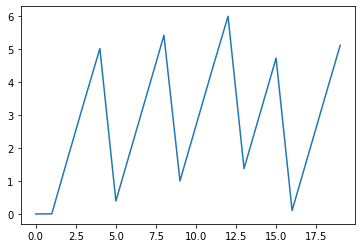

In [271]:
eg = Kuramoto(0,0.001,N)
eg.find_phase_profile()
eg.find_phase_profile_2()
plt.plot(eg.theta[:-1])

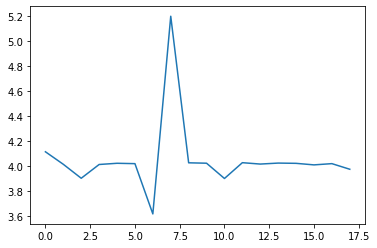

In [272]:
eg.find_dt_theta()
plt.plot(eg.v[1:-2])